In [219]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


sqkm = pd.read_excel('pop.xls', sheet_name='MYE', header=1, usecols='C:D, BI', 
                    skiprows=[2], nrows=33)

sqkm.rename(columns={'Area name': 'borough',
                    'Inner or Outer London': 'location',
                    'LAND AREA (Sq Km)': 'sqkm'},
           inplace=True)

# Convert borough variable to categorical type.
sqkm['borough'] = sqkm['borough'].astype('category')
# Convert location variable to lowercase categorical type.
sqkm['location'] = sqkm['location'].str.lower().astype('category')
# Assign both indicator variables to the index.
sqkm.set_index(['location', 'borough'], inplace=True)
sqkm.head(4)

sqkm
location borough                       
inner    City of London         2.89798
outer    Barking and Dagenham  36.08981
         Barnet                86.73733
         Bexley                60.55817

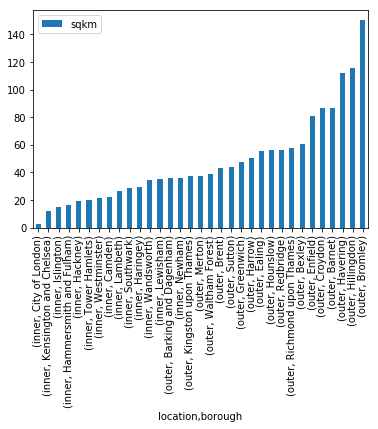

In [220]:
sqkm = sqkm.sort_values(by='sqkm')
sqkm.plot.bar()
plt.show()

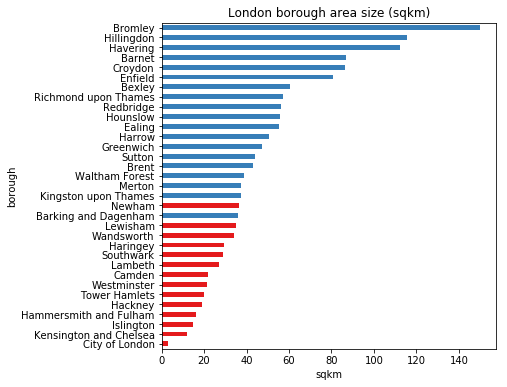

In [221]:
# Using a colormap, create an array of colours to
# show inner vs. outer borough.
cm = plt.get_cmap('Set1')
colours = [cm.colors[i] for i in
sqkm.index.get_level_values('location').codes]
# Create a new df with a single index (drop location).
boroughs = sqkm.reset_index(level='location', drop=True)
ax = boroughs['sqkm'].plot.barh(color=colours, figsize=(6, 6))
ax.set_title('London borough area size (sqkm)')
ax.set_xlabel('sqkm')
plt.show()

In [222]:
#Aggregate Location
totals = sqkm.groupby(level='location').sum()
totals

,sqkm
location,
inner,319.304380
outer,1252.774569


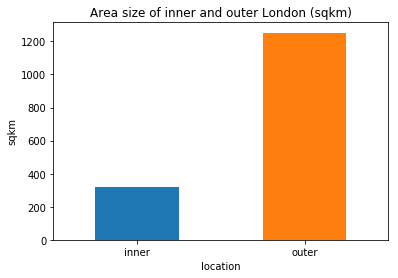

In [223]:
#Inner and outer london boroughs
ax = totals['sqkm'].plot.bar(rot=0)
ax.set_title('''Area size of inner and outer London (sqkm)''')
ax.set_ylabel('sqkm')
plt.show()



In [224]:
df = pd.read_excel('pop.xls', sheet_name='MYE', header=1, usecols='C:BG', 
                    skiprows=[2], nrows=33)

df.rename(columns={'Area name': 'borough',
                    'Inner or Outer London': 'location'},
           inplace=True)

df


,borough,location,1961,1962,1963,1964,1965,1966,1967,1968,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,City of London,Inner,5000,5000,4000,4000,4000,4000,4000,4000,...,7300,7600,7400.0,7500,7300,7400,7600,7600,8100,8760
1,Barking and Dagenham,Outer,176000,176000,174000,173000,170000,168000,167000,165000,...,167200,169000,172500.0,177600,182800,187000,190600,194400,198300,201979
2,Barnet,Outer,318000,318000,316000,315000,314000,315000,313000,310000,...,330800,334800,339200.0,345800,351400,357500,364000,369100,374900,379691
3,Bexley,Outer,210000,211000,212000,214000,215000,215000,215000,215000,...,223300,224600,226700.0,228100,230700,232800,234300,236700,239900,242142
4,Brent,Outer,295000,294000,294000,292000,291000,290000,289000,285000,...,276500,283300,290900.0,298100,304800,312200,314700,317300,320800,324012
5,Bromley,Outer,294000,296000,297000,299000,301000,302000,303000,304000,...,301000,302600,305000.0,306900,308600,310600,314000,317900,321300,324857
6,Camden,Inner,245000,244000,242000,239000,236000,234000,230000,226000,...,211000,211500,210300.0,212900,214700,220100,225000,229700,234800,241059
7,Croydon,Outer,325000,326000,326000,326000,326000,326000,327000,329000,...,340400,344000,349300.0,352800,358000,364800,368900,372800,376000,379031
8,Ealing,Outer,301000,302000,301000,302000,302000,302000,301000,302000,...,315300,318700,324000.0,330000,334100,339300,340700,342500,342100,343059
9,Enfield,Outer,272000,272000,272000,272000,272000,271000,271000,270000,...,287400,291500,297400.0,302000,307600,313900,317300,320500,324600,328433


In [225]:
# Convert borough variable to categorical.
df['borough'] = df['borough'].astype('category')
# Convert location variable to lowercase categorical.
df['location'] = df['location'].str.lower()
df['location'] = df['location'].astype('category')
df.iloc[:, 0:5].head(4)

,borough,location,1961,1962,1963
0,City of London,inner,5000,5000,4000
1,Barking and Dagenham,outer,176000,176000,174000
2,Barnet,outer,318000,318000,316000
3,Bexley,outer,210000,211000,212000


In [226]:
#Assign new variable for time series
ts = df.melt(id_vars=['borough', 'location'],
var_name='year', value_name='population')
ts.head()

,borough,location,year,population
0,City of London,inner,1961,5000.0
1,Barking and Dagenham,outer,1961,176000.0
2,Barnet,outer,1961,318000.0
3,Bexley,outer,1961,210000.0
4,Brent,outer,1961,295000.0


In [227]:
# Create a datetime series parsing the year strings.
# The data are mid-year estimates, so create timestampes
# to represent this.
ts['year'] = ts['year'].astype('str') +'/06/30'
ts['year'] = pd.to_datetime(ts['year'], format='%Y/%m/%d' )
# Assign the year column to the index, creating a DatetimeIndex.
ts.set_index('year', inplace=True)
# Convert the the DatetimeIndex to a PeriodIndex of day frequency.
ts = ts.to_period('D')
ts.head()

,borough,location,population
year,,,
1961-06-30,City of London,inner,5000.0
1961-06-30,Barking and Dagenham,outer,176000.0
1961-06-30,Barnet,outer,318000.0
1961-06-30,Bexley,outer,210000.0
1961-06-30,Brent,outer,295000.0


In [228]:
# Assign all indicator variables to the index.
ts.set_index(['location', 'borough'], inplace=True, append=True)
ts.sort_index(inplace=True)
ts.head()

population
year       location borough                           
1961-06-30 inner    Camden                    245000.0
                    City of London              5000.0
                    Hackney                   257000.0
                    Hammersmith and Fulham    221000.0
                    Haringey                  259000.0

In [229]:
ts.loc[('1961-06-30', 'inner')].head(5)

,population
borough,
Camden,245000.0
City of London,5000.0
Hackney,257000.0
Hammersmith and Fulham,221000.0
Haringey,259000.0


In [230]:
#Using slice
ts.loc[
    (
        slice(None), 
        slice(None), 
        'Westminster',
    ), 
    :
].head()

,,,population
year,location,borough,
1961-06-30,inner,Westminster,271000.0
1962-06-30,inner,Westminster,270000.0
1963-06-30,inner,Westminster,270000.0
1964-06-30,inner,Westminster,269000.0
1965-06-30,inner,Westminster,266000.0


In [231]:
ts.loc[
    (
        slice(None), 
        slice(None), 
        ['Camden', 'Lewisham'],
    ), 
    :
].head()

population
year       location borough             
1961-06-30 inner    Camden      245000.0
                    Lewisham    290000.0
1962-06-30 inner    Camden      244000.0
                    Lewisham    291000.0
1963-06-30 inner    Camden      242000.0

In [232]:
#Shows the index is now a day
ts.index

MultiIndex(levels=[[1961-06-30, 1962-06-30, 1963-06-30, 1964-06-30, 1965-06-30, 1966-06-30, 1967-06-30, 1968-06-30, 1969-06-30, 1970-06-30, 1971-06-30, 1972-06-30, 1973-06-30, 1974-06-30, 1975-06-30, 1976-06-30, 1977-06-30, 1978-06-30, 1979-06-30, 1980-06-30, 1981-06-30, 1982-06-30, 1983-06-30, 1984-06-30, 1985-06-30, 1986-06-30, 1987-06-30, 1988-06-30, 1989-06-30, 1990-06-30, 1991-06-30, 1992-06-30, 1993-06-30, 1994-06-30, 1995-06-30, 1996-06-30, 1997-06-30, 1998-06-30, 1999-06-30, 2000-06-30, 2001-06-30, 2002-06-30, 2003-06-30, 2004-06-30, 2005-06-30, 2006-06-30, 2007-06-30, 2008-06-30, 2009-06-30, 2010-06-30, 2011-06-30, 2012-06-30, 2013-06-30, 2014-06-30, 2015-06-30], ['inner', 'outer'], ['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley', 'Camden', 'City of London', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney', 'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea', 'Kingston upon Thames', '

In [233]:
#Cross section
ts.xs('Lewisham', level='borough').head()

,,population
year,location,
1961-06-30,inner,290000.0
1962-06-30,inner,291000.0
1963-06-30,inner,289000.0
1964-06-30,inner,288000.0
1965-06-30,inner,286000.0


In [234]:
ts.xs('inner', level='location').head()

population
year       borough                           
1961-06-30 Camden                    245000.0
           City of London              5000.0
           Hackney                   257000.0
           Hammersmith and Fulham    221000.0
           Haringey                  259000.0

In [235]:
# All inner boroughs in 1971.
ts.xs(['1971-06-30', 'inner'],
level=['year', 'location']).head()

,population
borough,
Camden,209300.0
City of London,4200.0
Hackney,223200.0
Hammersmith and Fulham,188800.0
Haringey,243400.0


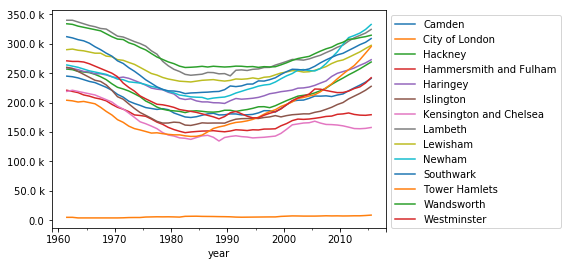

In [236]:
#plot inner boroughs
from matplotlib.ticker import EngFormatter
inner = ts.xs('inner', level='location').unstack()
ax = inner['population'].plot()
ax.yaxis.set_major_formatter(EngFormatter(places=1))
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

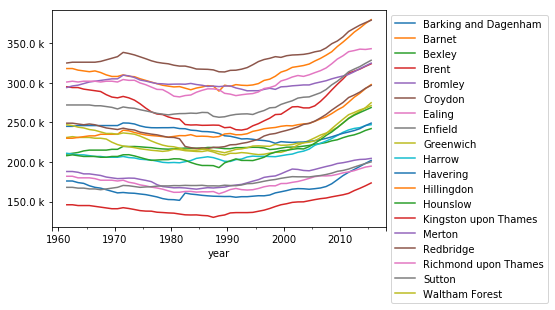

In [237]:
#Plot outer boroughs
from matplotlib.ticker import EngFormatter
outer = ts.xs('outer', level='location').unstack()
ax = outer['population'].plot()
ax.yaxis.set_major_formatter(EngFormatter(places=1))
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

In [238]:
# Group by index levels year and location, and sum values.
in_out = ts.groupby(level=['year', 'location']).sum()
in_out.head()

population
year       location            
1961-06-30 inner      3481000.0
           outer      4496000.0
1962-06-30 inner      3470000.0
           outer      4500000.0
1963-06-30 inner      3438000.0

In [239]:
# Move location level out of row index to columns index.
# This creates a multi-index column index.
in_out = in_out.unstack()
in_out.head(3)

population           
location        inner      outer
year                            
1961-06-30  3481000.0  4496000.0
1962-06-30  3470000.0  4500000.0
1963-06-30  3438000.0  4488000.0

In [240]:
in_out = in_out['population']
in_out.head(3)

location,inner,outer
year,,
1961-06-30,3481000.0,4496000.0
1962-06-30,3470000.0,4500000.0
1963-06-30,3438000.0,4488000.0


In [241]:
in_out=in_out.unstack()
in_out.head()

location  year      
inner     1961-06-30    3481000.0
          1962-06-30    3470000.0
          1963-06-30    3438000.0
          1964-06-30    3409000.0
          1965-06-30    3376000.0
dtype: float64

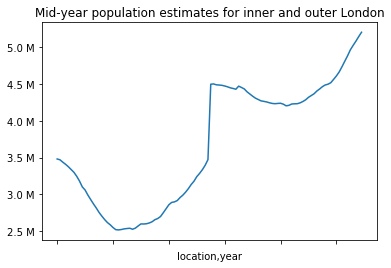

In [242]:
from matplotlib.ticker import EngFormatter
ax = in_out.plot()
ax.yaxis.set_major_formatter(EngFormatter(places=1))
ax.set_title('Mid-year population estimates for \
inner and outer London')
plt.show()

In [243]:
totals = sqkm.groupby(level='borough').sum()
totals

,sqkm
borough,
Barking and Dagenham,36.089810
Barnet,86.737330
Bexley,60.558170
Brent,43.235390
Bromley,150.148580
Camden,21.795970
City of London,2.897980
Croydon,86.519530
Ealing,55.527700


In [244]:
import pandas as pd
df2 = pd.read_excel('pop.xls',
sheet_name='MYE', header=1, usecols='C:BG',
skiprows=[2], nrows=33)
df2.rename(columns={'Area name': 'borough',
},
inplace=True)
# Convert borough variable to categorical.
df2['borough'] = df2['borough'].astype('category')
# Convert location variable to lowercase categorical.
#df2['location'] = df2['location'].str.lower()
#df2['location'] = df2['location'].astype('category')
df2.iloc[:, 0:5].head(4)

,borough,Inner or Outer London,1961,1962,1963
0,City of London,Inner,5000,5000,4000
1,Barking and Dagenham,Outer,176000,176000,174000
2,Barnet,Outer,318000,318000,316000
3,Bexley,Outer,210000,211000,212000


In [245]:
ts = df.melt(id_vars=['borough', 'location'],
var_name='year', value_name='population')
ts.head()

,borough,location,year,population
0,City of London,inner,1961,5000.0
1,Barking and Dagenham,outer,1961,176000.0
2,Barnet,outer,1961,318000.0
3,Bexley,outer,1961,210000.0
4,Brent,outer,1961,295000.0


In [246]:
# Create a datetime series parsing the year strings.
# The data are mid-year estimates, so create timestampes
# to represent this.
ts['year'] = ts['year'].astype('str') +'/06/30'
ts['year'] = pd.to_datetime(ts['year'], format='%Y/%m/%d' )
# Assign the year column to the index, creating a DatetimeIndex.
ts.set_index('year', inplace=True)
# Conver the the DatetimeIndex to a PeriodIndex of day frequency.
ts = ts.to_period('D')
ts.head()

,borough,location,population
year,,,
1961-06-30,City of London,inner,5000.0
1961-06-30,Barking and Dagenham,outer,176000.0
1961-06-30,Barnet,outer,318000.0
1961-06-30,Bexley,outer,210000.0
1961-06-30,Brent,outer,295000.0


In [247]:
# Assign all indicator variables to the index.
ts.set_index(['location', 'borough'], inplace=True, append=True)
ts.sort_index(inplace=True)
ts.head()

population
year       location borough                           
1961-06-30 inner    Camden                    245000.0
                    City of London              5000.0
                    Hackney                   257000.0
                    Hammersmith and Fulham    221000.0
                    Haringey                  259000.0

In [248]:
ts.loc[('1961-06-30', 'inner')].head()

,population
borough,
Camden,245000.0
City of London,5000.0
Hackney,257000.0
Hammersmith and Fulham,221000.0
Haringey,259000.0


In [249]:
ts.xs('inner', level='location').head()

population
year       borough                           
1961-06-30 Camden                    245000.0
           City of London              5000.0
           Hackney                   257000.0
           Hammersmith and Fulham    221000.0
           Haringey                  259000.0

In [250]:
in_out = ts.groupby(level=['year', 'borough']).sum()
in_out.head()

population
year       borough                         
1961-06-30 Barking and Dagenham    176000.0
           Barnet                  318000.0
           Bexley                  210000.0
           Brent                   295000.0
           Bromley                 294000.0

In [251]:
in_out = in_out.unstack()
in_out.head()

population                                          \
borough    Barking and Dagenham    Barnet    Bexley     Brent   Bromley   
year                                                                      
1961-06-30             176000.0  318000.0  210000.0  295000.0  294000.0   
1962-06-30             176000.0  318000.0  211000.0  294000.0  296000.0   
1963-06-30             174000.0  316000.0  212000.0  294000.0  297000.0   
1964-06-30             173000.0  315000.0  214000.0  292000.0  299000.0   
1965-06-30             170000.0  314000.0  215000.0  291000.0  301000.0   

                                                                      ...      \
borough       Camden City of London   Croydon    Ealing   Enfield     ...       
year                                                                  ...       
1961-06-30  245000.0         5000.0  325000.0  301000.0  272000.0     ...       
1962-06-30  244000.0         5000.0  326000.0  302000.0  272000.0     ...       
1963-06-30  242000.0         4000.0  326000.0  301000.0  272000.0     ...       
1964-06-30  239000.0         4000.0  326000.0  302000.0  272000.0     ...       
1965-06-30  236000.0         4000.0  326000.0  302000.0  272000.0     ...       

                                                                         \
borough       Merton    Newham Redbridge Richmond upon Thames Southwark   
year                                                                      
1961-06-30  188000.0  264000.0  249000.0             182000.0  312000.0   
1962-06-30  188000.0  262000.0  249000.0             182000.0  310000.0   
1963-06-30  187000.0  260000.0  248000.0             180000.0  307000.0   
1964-06-30  185000.0  257000.0  247000.0             180000.0  305000.0   
1965-06-30  185000.0  254000.0  248000.0             180000.0  301000.0   

                                                                          
borough       Sutton Tower Hamlets Waltham Forest Wandsworth Westminster  
year                                                                      
1961-06-30  168000.0      204000.0       247000.0   334000.0    271000.0  
1962-06-30  168000.0      203000.0       246000.0   333000.0    270000.0  
1963-06-30  167000.0      201000.0       244000.0   330000.0    270000.0  
1964-06-30  167000.0      202000.0       243000.0   328000.0    269000.0  
1965-06-30  166000.0      200000.0       241000.0   326000.0    266000.0  

[5 rows x 33 columns]

In [252]:
in_out = in_out['population']
in_out.head(3)

borough,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
year,,,,,,,,,,,,,,,,,,,,,
1961-06-30,176000.0,318000.0,210000.0,295000.0,294000.0,245000.0,5000.0,325000.0,301000.0,272000.0,...,188000.0,264000.0,249000.0,182000.0,312000.0,168000.0,204000.0,247000.0,334000.0,271000.0
1962-06-30,176000.0,318000.0,211000.0,294000.0,296000.0,244000.0,5000.0,326000.0,302000.0,272000.0,...,188000.0,262000.0,249000.0,182000.0,310000.0,168000.0,203000.0,246000.0,333000.0,270000.0
1963-06-30,174000.0,316000.0,212000.0,294000.0,297000.0,242000.0,4000.0,326000.0,301000.0,272000.0,...,187000.0,260000.0,248000.0,180000.0,307000.0,167000.0,201000.0,244000.0,330000.0,270000.0


In [253]:
sqkm.head(3)

sqkm
location borough                         
inner    City of London           2.89798
         Kensington and Chelsea  12.12970
         Islington               14.85984

In [254]:
ts.head(3)

population
year       location borough                   
1961-06-30 inner    Camden            245000.0
                    City of London      5000.0
                    Hackney           257000.0

In [255]:
#Merging data
ts2 = ts.join(sqkm, on=['location', 'borough'])
ts2.head()

population      sqkm
year       location borough                                     
1961-06-30 inner    Camden                    245000.0  21.79597
                    City of London              5000.0   2.89798
                    Hackney                   257000.0  19.06429
                    Hammersmith and Fulham    221000.0  16.40449
                    Haringey                  259000.0  29.58629

In [256]:
ts2.xs('Camden', level='borough').head()

,,population,sqkm
year,location,,
1961-06-30,inner,245000.0,21.79597
1962-06-30,inner,244000.0,21.79597
1963-06-30,inner,242000.0,21.79597
1964-06-30,inner,239000.0,21.79597
1965-06-30,inner,236000.0,21.79597


In [257]:
# We can do arithmatic between a multi-index
# DataFrames and another SINGLE index dataframe
# with a matching index.
# So, drop location from the index.
borough_size = sqkm.reset_index(level='location',
drop=True)
borough_size.head()

,sqkm
borough,
City of London,2.89798
Kensington and Chelsea,12.12970
Islington,14.85984
Hammersmith and Fulham,16.40449
Hackney,19.06429


In [258]:
ts['density'] = ts['population'] / borough_size['sqkm']
ts.head()

population       density
year       location borough                                         
1961-06-30 inner    Camden                    245000.0  11240.610076
                    City of London              5000.0   1725.339719
                    Hackney                   257000.0  13480.701353
                    Hammersmith and Fulham    221000.0  13471.921407
                    Haringey                  259000.0   8754.054665

In [259]:
# This is tidy data, because density changes
# across years.
ts.xs('Camden', level='borough').head()


,,population,density
year,location,,
1961-06-30,inner,245000.0,11240.610076
1962-06-30,inner,244000.0,11194.730035
1963-06-30,inner,242000.0,11102.969953
1964-06-30,inner,239000.0,10965.329829
1965-06-30,inner,236000.0,10827.689706


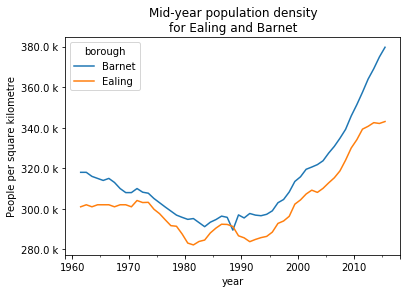

In [261]:
from matplotlib.ticker import EngFormatter
# Remove location from the index because we don’t need
# it to compare boroughs.
ts2 = ts.reset_index(level='location', drop=True)
# Re-sort the index: required for using slice().
ts2.sort_index(inplace=True)
b1 = 'Ealing'
b2 = 'Barnet'
# Select all times, and slice out only boroughs we are interested in.
# Select only density column.
ax = ts2.loc[(slice(None), [b1, b2]), 'population'].unstack().plot()
ax.yaxis.set_major_formatter(EngFormatter(places=1))
ax.set_title('''Mid-year population density
for {} and {}'''.format(b1, b2))
ax.set_ylabel('People per square kilometre')
plt.show()

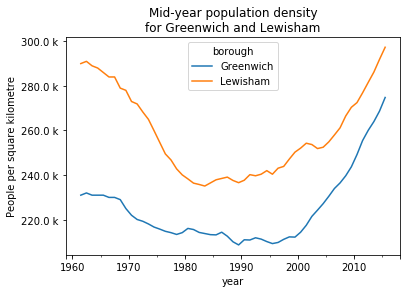

In [262]:
from matplotlib.ticker import EngFormatter
# Remove location from the index because we don’t need
# it to compare boroughs.
ts2 = ts.reset_index(level='location', drop=True)
# Re-sort the index: required for using slice().
ts2.sort_index(inplace=True)
b1 = 'Greenwich'
b2 = 'Lewisham'
# Select all times, and slice out only boroughs we are interested in.
# Select only density column.
ax = ts2.loc[(slice(None), [b1, b2]), 'population'].unstack().plot()
ax.yaxis.set_major_formatter(EngFormatter(places=1))
ax.set_title('''Mid-year population density
for {} and {}'''.format(b1, b2))
ax.set_ylabel('People per square kilometre')
plt.show()

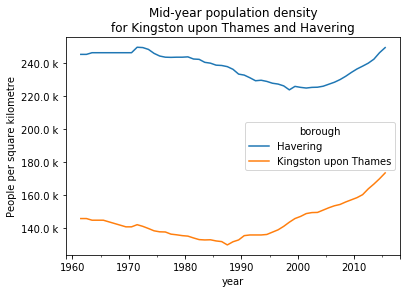

In [263]:
from matplotlib.ticker import EngFormatter
# Remove location from the index because we don’t need
# it to compare boroughs.
ts2 = ts.reset_index(level='location', drop=True)
# Re-sort the index: required for using slice().
ts2.sort_index(inplace=True)
b1 = 'Kingston upon Thames'
b2 = 'Havering'
# Select all times, and slice out only boroughs we are interested in.
# Select only density column.
ax = ts2.loc[(slice(None), [b1, b2]), 'population'].unstack().plot()
ax.yaxis.set_major_formatter(EngFormatter(places=1))
ax.set_title('''Mid-year population density
for {} and {}'''.format(b1, b2))
ax.set_ylabel('People per square kilometre')
plt.show()

In [264]:
# Group by index levels year and location, and sum values.
in_out = ts.groupby(level=['year', 'location']).sum()
in_out.head()

population        density
year       location                           
1961-06-30 inner      3481000.0  155935.225044
           outer      4496000.0   76976.004871
1962-06-30 inner      3470000.0  155489.056720
           outer      4500000.0   77005.681623
1963-06-30 inner      3438000.0  153687.334949

In [265]:
ts['density'] = ts['population'] / borough_size['sqkm']
ts.head()

population       density
year       location borough                                         
1961-06-30 inner    Camden                    245000.0  11240.610076
                    City of London              5000.0   1725.339719
                    Hackney                   257000.0  13480.701353
                    Hammersmith and Fulham    221000.0  13471.921407
                    Haringey                  259000.0   8754.054665

In [266]:
# All outer boroughs 2010
ts.xs(['2010-06-30', 'outer'],
level=['year', 'location'])

,population,density
borough,,
Barking and Dagenham,182800.0,5065.141656
Barnet,351400.0,4051.312163
Bexley,230700.0,3809.560295
Brent,304800.0,7049.780284
Bromley,308600.0,2055.297493
Croydon,358000.0,4137.794091
Ealing,334100.0,6016.816832
Enfield,307600.0,3805.240987
Greenwich,249200.0,5263.464712


In [267]:
outer = ts.xs(['2010-06-30', 'outer'],
level=['year', 'location'])

outer.idxmax()

population    Croydon
density         Brent
dtype: object

In [268]:
ts.xs('Southwark', level='borough')

,,population,density
year,location,,
1961-06-30,inner,312000.0,10813.313685
1962-06-30,inner,310000.0,10743.997571
1963-06-30,inner,307000.0,10640.023401
1964-06-30,inner,305000.0,10570.707288
1965-06-30,inner,301000.0,10432.075061
1966-06-30,inner,295000.0,10224.126721
1967-06-30,inner,290000.0,10050.836438
1968-06-30,inner,284000.0,9842.888097
1969-06-30,inner,279000.0,9669.597814


In [269]:
most = ts.xs('Southwark', level='borough')
most.idxmax()

population    (1961-06-30, inner)
density       (1961-06-30, inner)
dtype: object

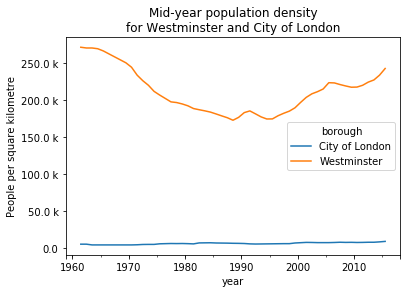

In [271]:
from matplotlib.ticker import EngFormatter
# Remove location from the index because we don’t need
# it to compare boroughs.
ts2 = ts.reset_index(level='location', drop=True)
# Re-sort the index: required for using slice().
ts2.sort_index(inplace=True)
b1 = 'Westminster'
b2 = 'City of London'
# Select all times, and slice out only boroughs we are interested in.
# Select only density column.
ax = ts2.loc[(slice(None), [b1, b2]), 'population'].unstack().plot()
ax.yaxis.set_major_formatter(EngFormatter(places=1))
ax.set_title('''Mid-year population density
for {} and {}'''.format(b1, b2))
ax.set_ylabel('People per square kilometre')
plt.show()

In [283]:
in_out = ts2.groupby(level=['year', 'borough']).sum()
in_out.head()


population      density
year       borough                                      
1961-06-30 Barking and Dagenham    176000.0  4876.722820
           Barnet                  318000.0  3666.241513
           Bexley                  210000.0  3467.740191
           Brent                   295000.0  6823.114120
           Bromley                 294000.0  1958.060476

In [280]:
ts2['density'] = ts2['population'] / borough_size['sqkm']
ts2.head()

population      density
year       borough                                      
1961-06-30 Barking and Dagenham    176000.0  4876.722820
           Barnet                  318000.0  3666.241513
           Bexley                  210000.0  3467.740191
           Brent                   295000.0  6823.114120
           Bromley                 294000.0  1958.060476

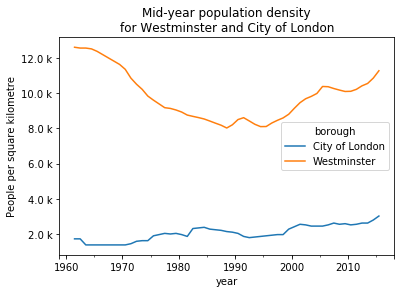

In [281]:
from matplotlib.ticker import EngFormatter
# Remove location from the index because we don’t need
# it to compare boroughs.
ts2 = ts.reset_index(level='location', drop=True)
# Re-sort the index: required for using slice().
ts2.sort_index(inplace=True)
b1 = 'Westminster'
b2 = 'City of London'
# Select all times, and slice out only boroughs we are interested in.
# Select only density column.
ax = ts2.loc[(slice(None), [b1, b2]), 'density'].unstack().plot()
ax.yaxis.set_major_formatter(EngFormatter(places=1))
ax.set_title('''Mid-year population density
for {} and {}'''.format(b1, b2))
ax.set_ylabel('People per square kilometre')
plt.show()

KeyError: "['City of London' 'Westminster'] not in index"

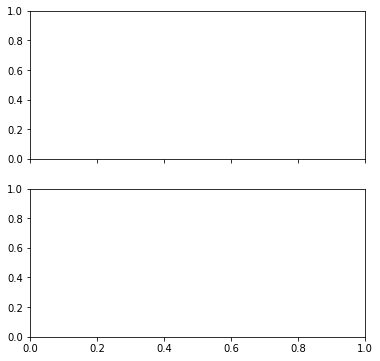

In [287]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6), sharex=True)
# Plot populations on top plot.
in_out[['City of London', 'Westminster']].plot(ax=ax1)
ax1.yaxis.set_major_formatter(EngFormatter(places=1))
ax1.set_title('Mid-year population estimates for \
inner and outer London')
ax1.set_ylabel('population')
# Plot difference on bottom plot.
difference.plot(ax=ax2)
ax2.yaxis.set_major_formatter(EngFormatter(places=1))
ax2.set_title('Difference between the populations of \
outer and inner London')
fig.subplots_adjust(hspace=0.3)